# Assignment 1 - DV2599 Maskininlärning
Victor Arvidsson

viar19@student.bth.se

In [1]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # disable warning

## Load and analyze dataset

In [2]:
df = pd.read_csv('spambase.data')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


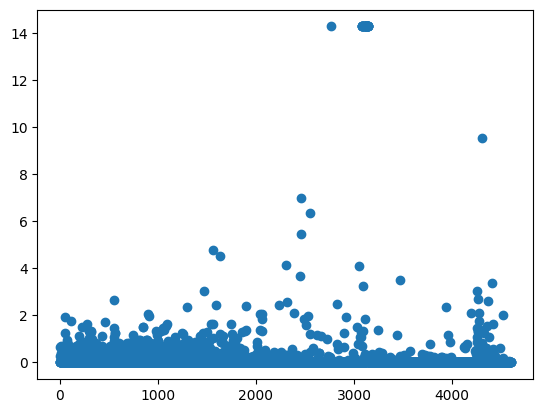

In [4]:
plt.scatter(df.index, df['word_freq_address'])

## Dicretize data using kmeans strategy

In [5]:
for col in df.columns.values[:-1]:
    dicretizer = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='kmeans')
    df[col] = dicretizer.fit_transform(df[[col]])

In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.802869,0.599435,1.476853,0.052597,1.078896,0.781787,0.762443,0.678983,0.773093,0.909368,...,0.544447,1.454466,0.461856,1.360356,0.857857,0.357314,0.499674,0.750706,1.612910,0.394045
std,1.950596,2.150771,2.460902,0.801801,1.904820,1.916570,2.120467,1.950744,2.231256,2.107812,...,1.793294,1.966939,1.781887,2.358819,1.999404,1.467072,1.227604,2.155027,2.535213,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.000000


In [7]:
len(df.columns.values)

58

## Implement algorithm

In [8]:
spam = df.loc[df['spam'] == 1.0]

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(spam, spam['spam'], train_size=0.01, random_state=100)
x_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1531,5.0,3.0,3.0,0.0,0.0,0.0,5.0,5.0,6.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1
912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,1
1594,0.0,10.0,0.0,0.0,4.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
1340,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0.0,1.0,0.0,0.0,1.0,7.0,3.0,3.0,6.0,1
1252,0.0,6.0,4.0,0.0,2.0,0.0,6.0,3.0,0.0,3.0,...,0.0,6.0,0.0,4.0,9.0,0.0,2.0,3.0,4.0,1
1679,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,...,1.0,1.0,0.0,5.0,3.0,0.0,1.0,2.0,3.0,1
280,0.0,7.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,...,0.0,4.0,0.0,3.0,2.0,2.0,3.0,2.0,1.0,1
752,0.0,0.0,4.0,0.0,3.0,0.0,4.0,2.0,0.0,4.0,...,0.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,2.0,1
1009,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,7.0,3.0,0.0,1.0,1.0,1.0,1
802,1.0,0.0,4.0,0.0,3.0,7.0,2.0,2.0,5.0,0.0,...,0.0,1.0,0.0,3.0,2.0,0.0,2.0,12.0,8.0,1


In [10]:
def LGG_set(d: pd.DataFrame):
    x = d.iloc[0]
    H = x
    for i in range(1, len(d)):
        x = d.iloc[i]
        H = LGG_conj(H, x)
    return H

def LGG_conj(H, x):
    for col in df.columns.values[:-1]:
        if H[col] != x[col]:
            H[col] = None
    return H

def predict_one(H, x):
    for col in df.columns.values[:-1]:
        isNan = H[col] != H[col] # NaN != NaN acc. to IEEE 754
        if H[col] != x[col] and not isNan:
            return 0
    return 1

def predict_all(H, d):
    FP = FN = TP = TN = 0
    for i in range(len(d)):
        x = d.iloc[i]
        predicted = predict_one(H, x)
        actual = x['spam']
        if predicted == 1 and actual == 1:
            TP += 1
        elif predicted == 1 and actual == 0:
            FP += 1
        elif predicted == 0 and actual == 1:
            FN += 1
        else:
            TN += 1
    return TP, FP, FN, TN

res = LGG_set(x_train)

## Results

In [11]:
TP, FP, FN, TN = predict_all(res, df)
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
print(f'{accuracy=:.3f} {precision=:.3f} {recall=:.3f} {f1=:.3f}')

accuracy=0.788 precision=0.698 recall=0.813 f1=0.751


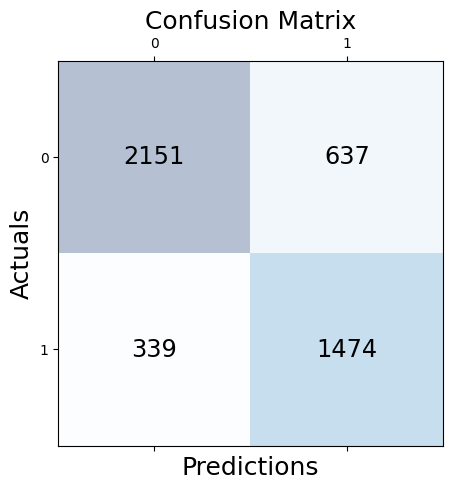

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
conf_matrix = [[TN, FP], [FN, TP]]
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j, y=i,s=conf_matrix[i][j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Conjunctive rule

In [13]:
res.dropna()

word_freq_hp            0.0
word_freq_hpl           0.0
word_freq_george        0.0
word_freq_650           0.0
word_freq_lab           0.0
word_freq_labs          0.0
word_freq_telnet        0.0
word_freq_857           0.0
word_freq_data          0.0
word_freq_415           0.0
word_freq_parts         0.0
word_freq_pm            0.0
word_freq_cs            0.0
word_freq_meeting       0.0
word_freq_project       0.0
word_freq_edu           0.0
word_freq_table         0.0
word_freq_conference    0.0
char_freq_[             0.0
spam                    1.0
Name: 1531, dtype: float64